# World Happiness Analysis

In [23]:
import numpy as np
import pandas as pd
df = pd.read_csv("../data/WHR2023.csv")
df

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,0.095,3.394,3.020,7.007,0.652,55.375,0.664,0.086,0.834,1.778,0.531,0.784,0.105,0.375,0.183,0.068,1.162
133,Zimbabwe,3.204,0.061,3.323,3.084,7.641,0.690,54.050,0.654,-0.046,0.766,1.778,0.758,0.881,0.069,0.363,0.112,0.117,0.905
134,Sierra Leone,3.138,0.082,3.299,2.976,7.394,0.555,54.900,0.660,0.105,0.858,1.778,0.670,0.540,0.092,0.371,0.193,0.051,1.221
135,Lebanon,2.392,0.044,2.479,2.305,9.478,0.530,66.149,0.474,-0.141,0.891,1.778,1.417,0.476,0.398,0.123,0.061,0.027,-0.110


In [24]:
df.isnull().sum()

Country name                                  0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       1
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         1
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           1
dtype: int64

In [25]:
df['Healthy life expectancy']=df['Healthy life expectancy'].fillna(df['Healthy life expectancy'].mean())
df['Explained by: Healthy life expectancy']=df['Explained by: Healthy life expectancy'].fillna(df['Explained by: Healthy life expectancy'].mean())   
df['Dystopia + residual']=df['Dystopia + residual'].fillna(df['Dystopia + residual'].mean())
df.isnull().sum()


Country name                                  0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   Ladder score                                137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     137 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                                  137 non-null    float64
 10  Perceptions of

In [27]:
df.shape

(137, 19)

### Objective
Analyze factors influencing happiness scores across countries.

In [28]:
num_cols=df.select_dtypes(include='number').columns
cat_cols=df.select_dtypes(include='object').columns
num_cols, cat_cols

(Index(['Ladder score', 'Standard error of ladder score', 'upperwhisker',
        'lowerwhisker', 'Logged GDP per capita', 'Social support',
        'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
        'Perceptions of corruption', 'Ladder score in Dystopia',
        'Explained by: Log GDP per capita', 'Explained by: Social support',
        'Explained by: Healthy life expectancy',
        'Explained by: Freedom to make life choices',
        'Explained by: Generosity', 'Explained by: Perceptions of corruption',
        'Dystopia + residual'],
       dtype='object'),
 Index(['Country name'], dtype='object'))

In [29]:
features=['Explained by: Log GDP per capita','Explained by: Social support','Explained by: Healthy life expectancy','Explained by: Freedom to make life choices','Explained by: Perceptions of corruption']
features

['Explained by: Log GDP per capita',
 'Explained by: Social support',
 'Explained by: Healthy life expectancy',
 'Explained by: Freedom to make life choices',
 'Explained by: Perceptions of corruption']

In [30]:
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,5.539796,0.064715,5.666526,5.412971,9.449796,0.799073,64.967632,0.787394,0.022431,0.725401,1.778000e+00,1.406985,1.156212,0.366176,0.540000,0.148474,0.145898,1.777838
std,1.139929,0.023031,1.117421,1.163724,1.207302,0.129222,5.729210,0.112371,0.141707,0.176956,2.897173e-15,0.432963,0.326322,0.156114,0.149501,0.076053,0.126723,0.502532
min,1.859000,0.029000,1.923000,1.795000,5.527000,0.341000,51.530000,0.382000,-0.254000,0.146000,1.778000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.110000
25%,4.724000,0.047000,4.980000,4.496000,8.591000,0.722000,60.698000,0.724000,-0.074000,0.668000,1.778000e+00,1.099000,0.962000,0.250000,0.455000,0.097000,0.060000,1.556000
50%,5.684000,0.060000,5.797000,5.529000,9.567000,0.827000,65.825000,0.801000,0.001000,0.774000,1.778000e+00,1.449000,1.227000,0.389000,0.557000,0.137000,0.111000,1.845000
75%,6.334000,0.077000,6.441000,6.243000,10.540000,0.896000,69.350000,0.874000,0.117000,0.846000,1.778000e+00,1.798000,1.401000,0.486000,0.656000,0.199000,0.187000,2.078000
max,7.804000,0.147000,7.875000,7.733000,11.660000,0.983000,77.280000,0.961000,0.531000,0.929000,1.778000e+00,2.200000,1.620000,0.702000,0.772000,0.422000,0.561000,2.955000


In [31]:
df[features].describe()

,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Perceptions of corruption
count,137.000000,137.000000,137.000000,137.000000,137.000000
mean,1.406985,1.156212,0.366176,0.540000,0.145898
std,0.432963,0.326322,0.156114,0.149501,0.126723
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.099000,0.962000,0.250000,0.455000,0.060000
50%,1.449000,1.227000,0.389000,0.557000,0.111000
75%,1.798000,1.401000,0.486000,0.656000,0.187000
max,2.200000,1.620000,0.702000,0.772000,0.561000


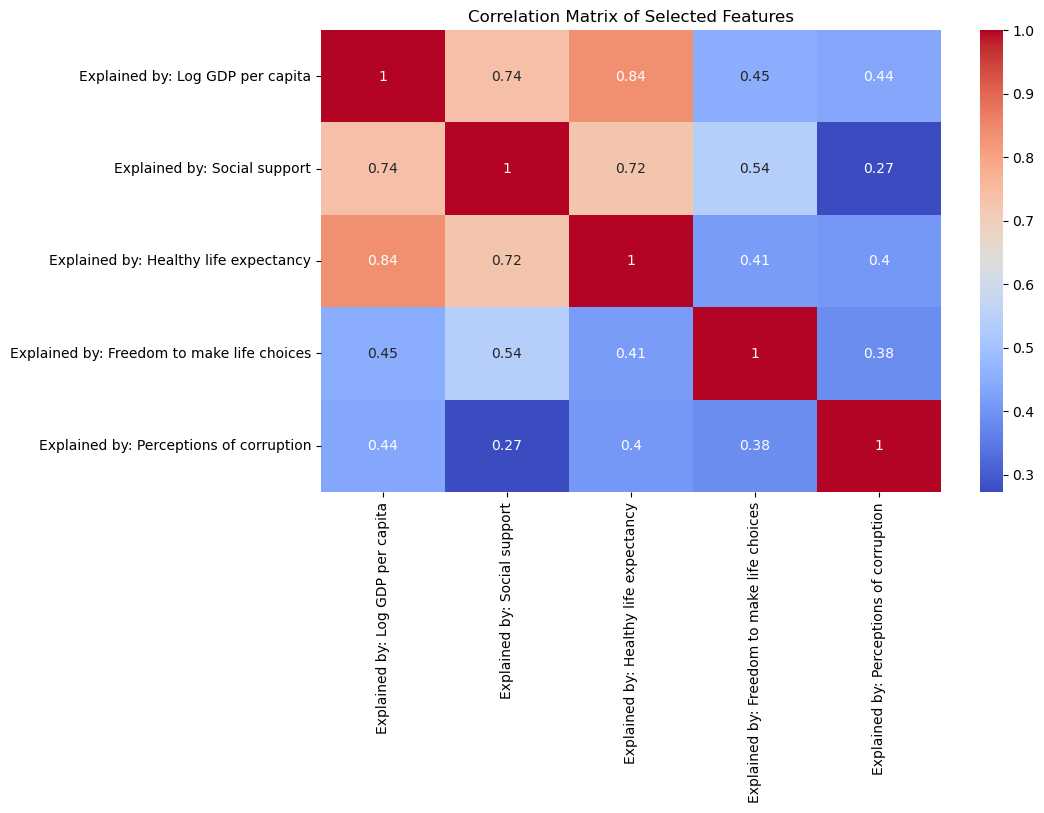

In [33]:
df[features].corr()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [41]:
target_corr = df[features + ['Ladder score']].corr()['Ladder score'].sort_values(ascending=False)
target_corr.drop('Ladder score')

Explained by: Social support                  0.834604
Explained by: Log GDP per capita              0.784342
Explained by: Healthy life expectancy         0.745849
Explained by: Freedom to make life choices    0.662909
Explained by: Perceptions of corruption       0.471913
Name: Ladder score, dtype: float64

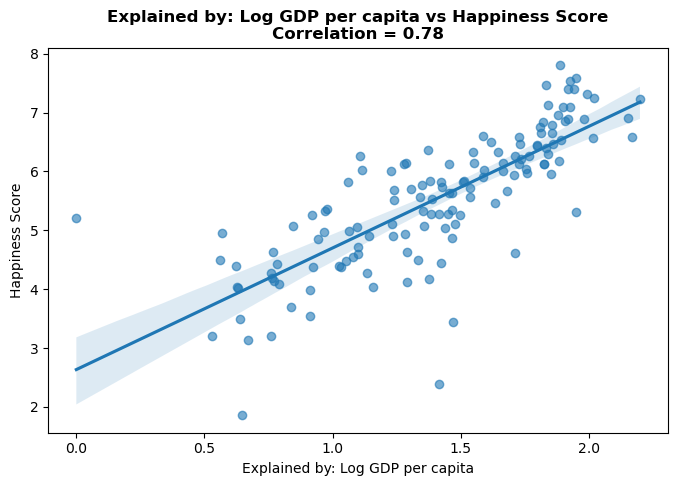

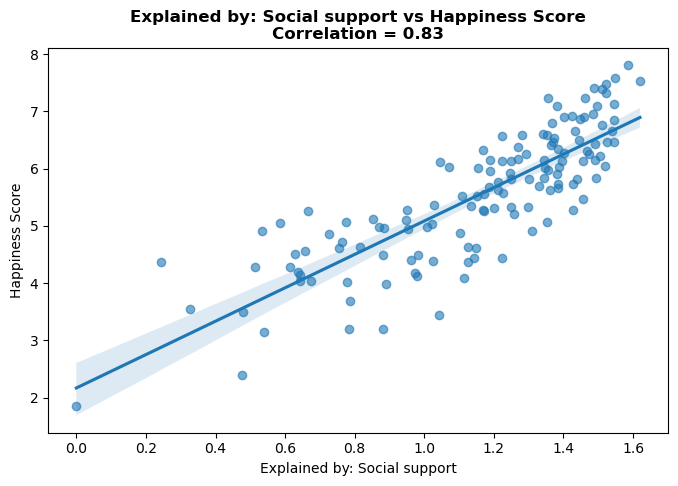

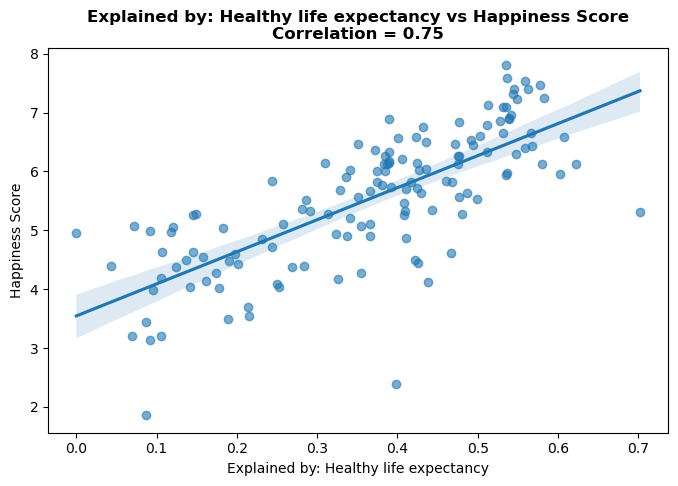

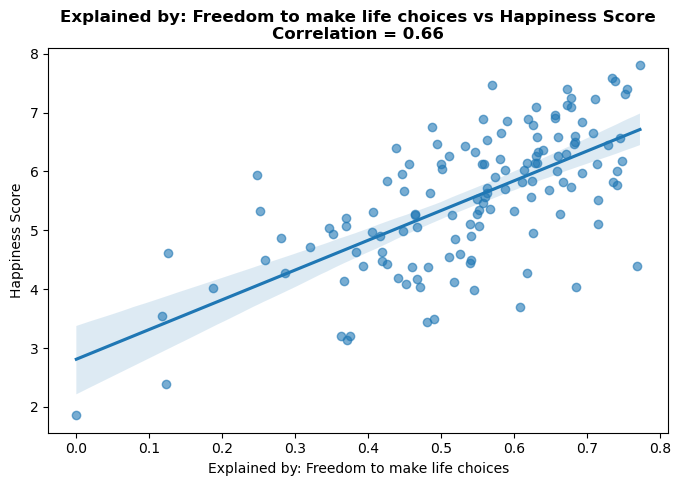

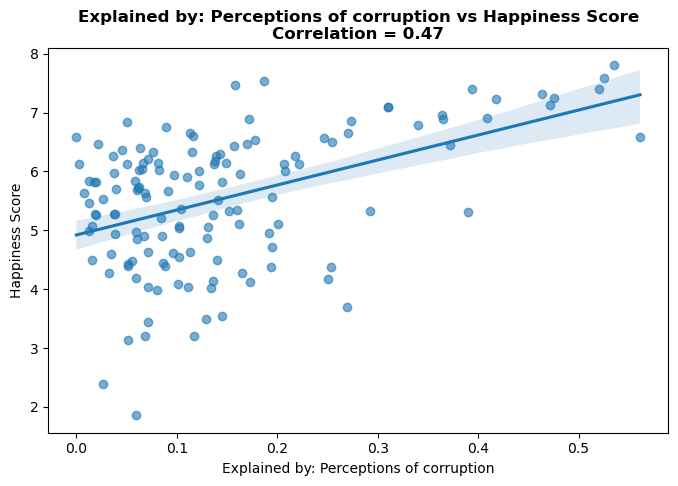

In [55]:
for col in features:
    corr = df[col].corr(df['Ladder score'])

    plt.figure(figsize=(8, 5))
    sns.regplot(x=df[col], y=df['Ladder score'], scatter_kws={'alpha':0.6})

    plt.title(f"{col} vs Happiness Score\nCorrelation = {corr:.2f}",fontsize=12, weight='bold')

    plt.xlabel(col)
    plt.ylabel("Happiness Score")

    plt.show()

## Key Insights

- Social support shows the strongest correlation with happiness, indicating that community and relationships play a crucial role in well-being.
- Economic prosperity (GDP per capita) and healthy life expectancy are strongly associated with higher happiness scores.
- Freedom to make life choices contributes independently to happiness beyond economic factors.
- Perceptions of corruption show a weaker but still meaningful relationship with happiness.